In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Esecuzione KS

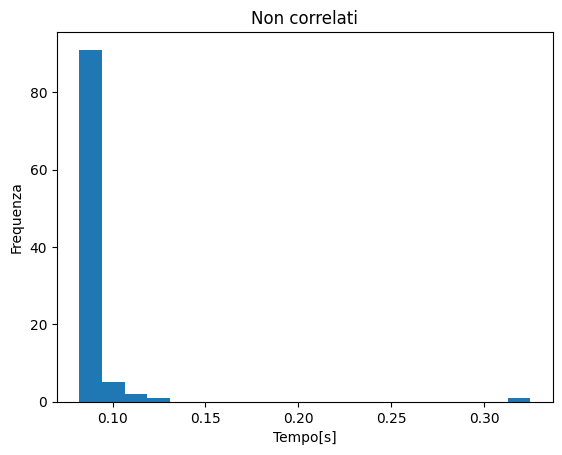

mean: 0.08907539


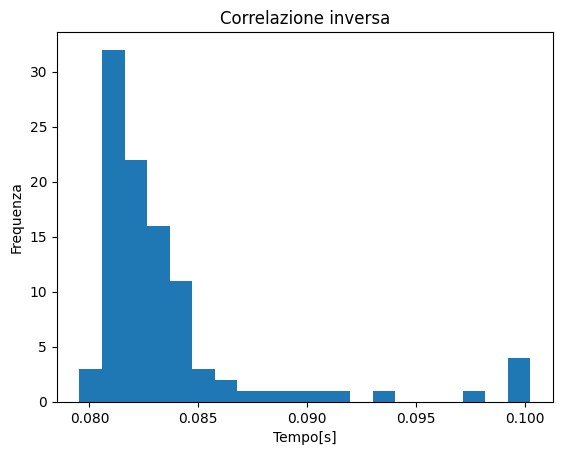

mean: 0.08365881999999997


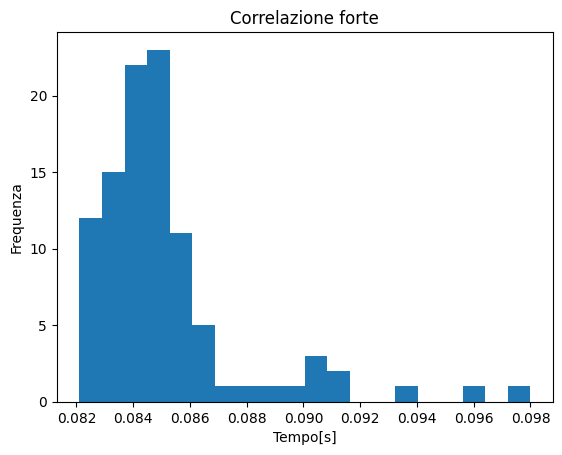

mean: 0.08509633


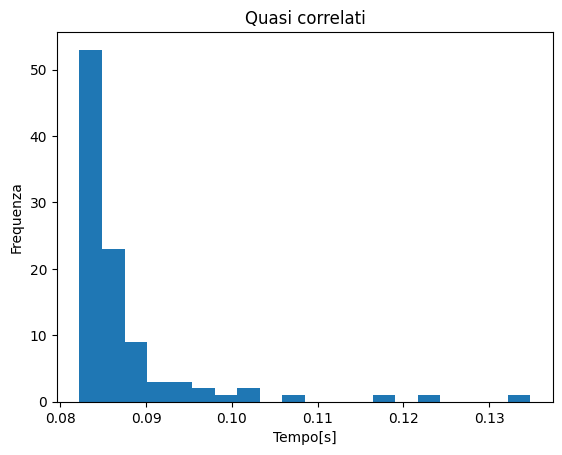

mean: 0.08745404000000001


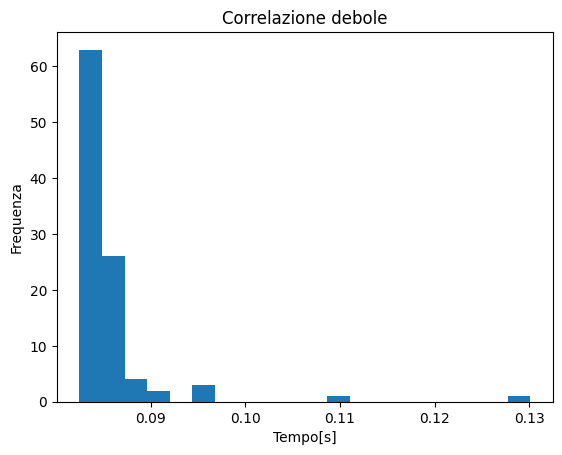

mean: 0.08560784000000002


In [6]:
types = ['uncorr', 'inv', 'str', 'almost', 'weak']
types_conv = ['Non correlati', 'Correlazione inversa', 'Correlazione forte', 'Quasi correlati', 'Correlazione debole']

df = pd.read_csv('csv/ks/csv_c12000_n1000_r12000_fn100_mode0_div1_cut1.csv')
df

# for nr, i in enumerate(types):
#     val = df[df['typename'] == i]
#     plt.hist(val['time_original'])
#     #val['time_original'].plot.hist()
#     plt.title(types_conv[nr])
#     plt.show()


for nr, i in enumerate(types):
    val = df[df['typename'] == i]
    plt.hist(val['time_original'], bins=20)
    plt.title(types_conv[nr])
    plt.xlabel('Tempo[s]')
    plt.ylabel('Frequenza')
    plt.show()
    print(f"mean: {val['time_original'].mean()}")

In [17]:
csv = pd.read_csv("csv/ks/csv_c50000_n1000_r50000_fn100_mode0_div1_cut1.csv")
csv

,typename,time_original,time_original_prealloc
0,uncorr,1.383841,0.307906
1,uncorr,0.428097,0.307753
2,uncorr,0.388083,0.305838
3,uncorr,0.386562,0.302738
4,uncorr,0.399067,0.348869
...,...,...,...
495,weak,0.374264,0.295293
496,weak,0.376389,0.296981
497,weak,0.377440,0.302355
498,weak,0.373351,0.281781


In [8]:
types = csv['typename'].unique()

means = csv.groupby('typename').mean()
variances = csv.groupby('typename').var()

## means

In [12]:
means

,time_original,time_original_prealloc
typename,,
almost,0.404351,0.316190
inv,0.392028,0.302804
str,0.405449,0.317068
uncorr,0.431634,0.317326
weak,0.401863,0.307986


In [10]:
variances

,time_original,time_original_prealloc
typename,,
almost,0.000482,0.000221
inv,0.000411,0.000233
str,0.000511,0.000414
uncorr,0.011199,0.000401
weak,0.000935,0.000280


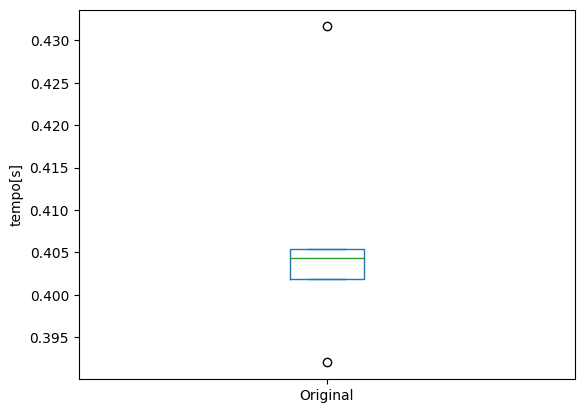

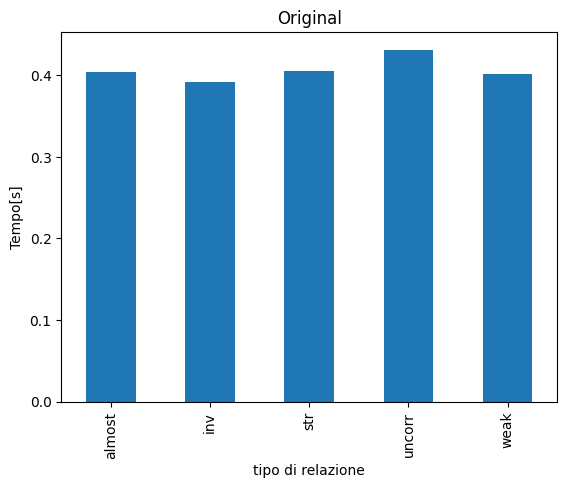

preallocazione:


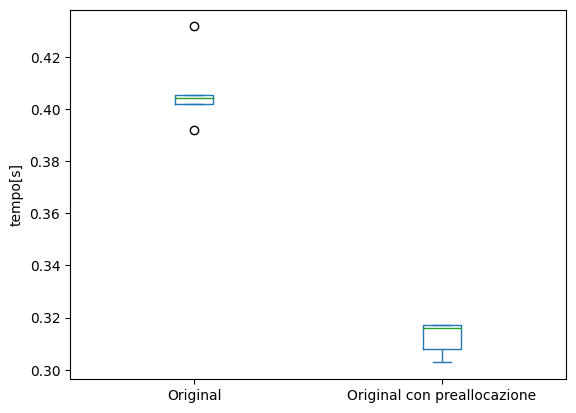

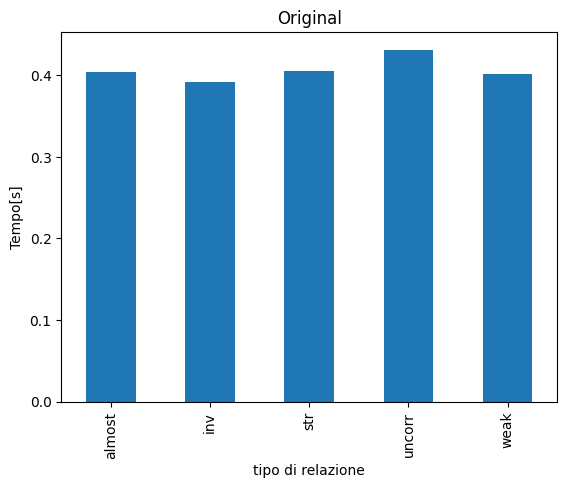

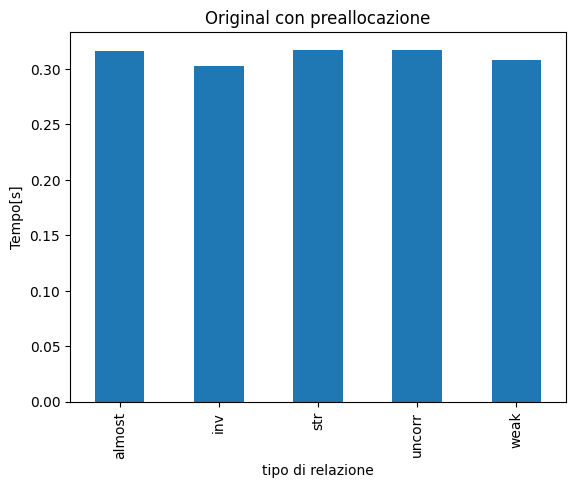

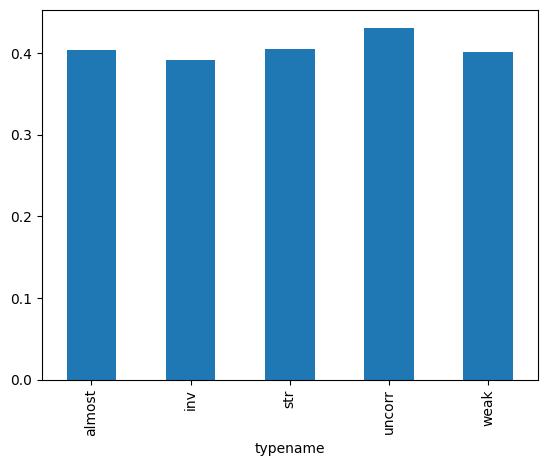

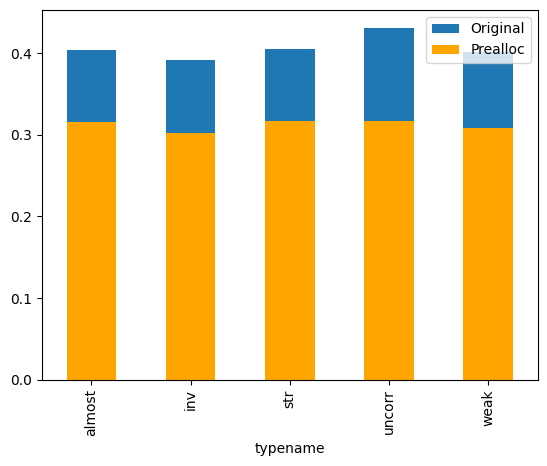

In [48]:
cols = ['time_original']
titles = ['Original']

means[cols].plot.box()
plt.gca().set_xticklabels(titles)
plt.gca().set_ylabel('tempo[s]')
plt.show()

for i, col in enumerate(cols):
    fig, ax = plt.subplots()
    means[col].plot.bar()
    ax.set_title(titles[i])
    ax.set_ylabel('Tempo[s]')
    ax.set_xlabel('tipo di relazione')
    plt.show()


print("preallocazione:")


cols = ['time_original', 'time_original_prealloc']
titles = ['Original', 'Original con preallocazione']

means[cols].plot.box()
plt.gca().set_xticklabels(titles)
plt.gca().set_ylabel('tempo[s]')
plt.show()

for i, col in enumerate(cols):
    fig, ax = plt.subplots()
    means[col].plot.bar()
    ax.set_title(titles[i])
    ax.set_ylabel('Tempo[s]')
    ax.set_xlabel('tipo di relazione')
    plt.show()

for i, col in enumerate(cols):
    means[col].plot.bar()
plt.show()



# Crea la figura e l'oggetto axes
fig, ax = plt.subplots()


# Plotta il primo grafico
# means[col].plot.bar(ax=ax, color='blue')

# means[col].plot.bar(ax=ax, color='green')

means['time_original'].plot.bar(ax=ax)

means['time_original_prealloc'].plot.bar(ax=ax, color='orange')

# Aggiungi la legenda
ax.legend(['Original', 'Prealloc'])

# Visualizza il grafico
plt.show()